In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [6]:
wv_matrix = np.load('../../processed_files/w2v/webis_w2v_matrix.npy')
df = pickle.load(open("../../processed_files/webis/df.pickle", "rb"))

In [7]:
wv_matrix.shape

(15718, 300)

In [8]:
df.head()

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comte, would, advise, irrational, proceeding,...",[m. comte would not advise so irrational a pro...
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, comte, would, spurn, irrational, reason...",[even m. comte would spurn such irrational rea...
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture, illustrating, shortest, easiest, way...",[picture illustrating the shortest and easiest...
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[picture, exemplifies, straight, easiest, way,...",[this picture exemplifies the straight and eas...
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, course, bill, going, get, sooner, later...","[thad, of course. and, bill, we're going to ge..."


In [9]:
df.shape

(15718, 7)

In [10]:
type(wv_matrix[0])

numpy.ndarray

In [11]:
np.average(wv_matrix[[0, 1, 2]], axis=0)

array([ 0.01657444,  0.02364332,  0.07118058,  0.128861  , -0.038624  ,
        0.04675604,  0.09518544, -0.0829853 ,  0.10187326,  0.07640033,
       -0.02214276, -0.12071962,  0.03718986,  0.05902361, -0.12749396,
        0.12606715,  0.0413932 ,  0.04472241, -0.00414988, -0.0716822 ,
        0.03134482,  0.01115429, -0.00405636,  0.03513135,  0.03838523,
       -0.07946985, -0.06201752,  0.05571245, -0.01299383, -0.00936767,
       -0.0194614 , -0.05519752, -0.02476717,  0.00450478, -0.00138165,
        0.03967929,  0.03193636,  0.00123056,  0.07869953, -0.00080847,
        0.12450544, -0.00131653,  0.04598175, -0.01444796, -0.03564368,
       -0.06068273, -0.07029418, -0.00522547, -0.05014675,  0.01927268,
       -0.01128429,  0.01401199, -0.05900367, -0.0540414 ,  0.0297938 ,
        0.07122085, -0.03742804, -0.09289284,  0.03959099, -0.10036035,
       -0.02083687,  0.03889902, -0.01304166, -0.0759454 , -0.01668083,
       -0.00835046, -0.05852776,  0.07776203, -0.03686717,  0.05

## DB Scan

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(wv_matrix)

In [14]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [15]:
num_clusters = max(dbscan.labels_)
num_clusters

515

In [16]:
dbscan

DBSCAN(eps=0.1)

In [17]:
index_cluster = zip(range(len(dbscan.labels_)), dbscan.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[456]

-1

In [18]:
cluster_index = list(zip(dbscan.labels_, range(len(dbscan.labels_))))

In [19]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [20]:
for i in range(num_clusters):
    print('cluster: ', i, 'size: ', len(cluster_list[i]))

cluster:  0 size:  337
cluster:  1 size:  5
cluster:  2 size:  5
cluster:  3 size:  5
cluster:  4 size:  5
cluster:  5 size:  5
cluster:  6 size:  6
cluster:  7 size:  52
cluster:  8 size:  5
cluster:  9 size:  5
cluster:  10 size:  7
cluster:  11 size:  5
cluster:  12 size:  5
cluster:  13 size:  5
cluster:  14 size:  5
cluster:  15 size:  5
cluster:  16 size:  9
cluster:  17 size:  6
cluster:  18 size:  5
cluster:  19 size:  5
cluster:  20 size:  5
cluster:  21 size:  5
cluster:  22 size:  7
cluster:  23 size:  6
cluster:  24 size:  5
cluster:  25 size:  6
cluster:  26 size:  6
cluster:  27 size:  5
cluster:  28 size:  5
cluster:  29 size:  8
cluster:  30 size:  5
cluster:  31 size:  8
cluster:  32 size:  5
cluster:  33 size:  5
cluster:  34 size:  5
cluster:  35 size:  6
cluster:  36 size:  5
cluster:  37 size:  5
cluster:  38 size:  13
cluster:  39 size:  7
cluster:  40 size:  5
cluster:  41 size:  5
cluster:  42 size:  5
cluster:  43 size:  12
cluster:  44 size:  6
cluster:  45 si

In [21]:
len(cluster_list[0])

337

In [22]:
len(cluster_list[1])

5

In [23]:
len(cluster_list[2])

5

In [24]:
len(cluster_list[num_clusters-1])

6

In [25]:
cluster_list[1]

[(1, 258), (1, 260), (1, 262), (1, 263), (1, 14718)]

In [26]:
[i[1] for i in cluster_list[0]]

[109,
 149,
 433,
 467,
 537,
 681,
 873,
 915,
 2033,
 2043,
 2993,
 3075,
 3425,
 4367,
 4789,
 5463,
 5469,
 5485,
 6115,
 6375,
 7127,
 7409,
 7579,
 7655,
 7741,
 7793,
 7903,
 7931,
 7971,
 8075,
 8145,
 8169,
 8257,
 8329,
 8449,
 8461,
 8517,
 8559,
 8569,
 8721,
 9087,
 9195,
 9249,
 9319,
 9597,
 9653,
 9707,
 9831,
 9879,
 9897,
 9929,
 9933,
 10013,
 10107,
 10141,
 10147,
 10233,
 10273,
 10321,
 10361,
 10427,
 10473,
 10587,
 10685,
 10703,
 10721,
 10725,
 10815,
 10831,
 11485,
 11673,
 11693,
 11859,
 12023,
 12109,
 12193,
 12437,
 12451,
 12453,
 12457,
 12463,
 12477,
 12485,
 12499,
 12503,
 12513,
 12515,
 12517,
 12529,
 12531,
 12541,
 12545,
 12551,
 12573,
 12583,
 12589,
 12607,
 12613,
 12621,
 12633,
 12647,
 12651,
 12655,
 12661,
 12677,
 12681,
 12685,
 12705,
 12711,
 12715,
 12719,
 12727,
 12733,
 12747,
 12751,
 12763,
 12769,
 12775,
 12781,
 12791,
 12793,
 12805,
 12809,
 12821,
 12831,
 12833,
 12847,
 12853,
 12865,
 12871,
 12877,
 12887,
 129

In [27]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    cluster_centroid = np.average(wv_matrix[[i[1] for i in cluster_list[index]]], axis=0)
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-wv_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [28]:
intracluster_similarity(2)

(0.0, 0.0)

In [29]:
intracluster_similarity(1)

(0.0, 0.0)

In [30]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df.loc[index].to_frame().T
    #cluster_df = df.loc[index_list[1:]]
    cluster_df = df.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [31]:
generate_raw_content_cluster_df(0)

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed,cluster
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comte, would, advise, irrational, proceeding,...",[m. comte would not advise so irrational a pro...,0
149,1065,paraphrase.txt,1065-paraphrase.txt,,False,[],[ ],0
433,1193,paraphrase.txt,1193-paraphrase.txt,,False,[],[ ],0
467,1208,paraphrase.txt,1208-paraphrase.txt,,False,[],[ ],0
537,124,paraphrase.txt,124-paraphrase.txt,,False,[],[ ],0
681,1304,paraphrase.txt,1304-paraphrase.txt,,False,[],[ ],0
873,1391,paraphrase.txt,1391-paraphrase.txt,,False,[],[ ],0
915,141,paraphrase.txt,141-paraphrase.txt,,False,[],[ ],0
2033,1913,paraphrase.txt,1913-paraphrase.txt,,False,[],[ ],0
2043,1918,paraphrase.txt,1918-paraphrase.txt,,False,[],[ ],0


In [32]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x14cd68588>,
 <a list of 11 Text xticklabel objects>)

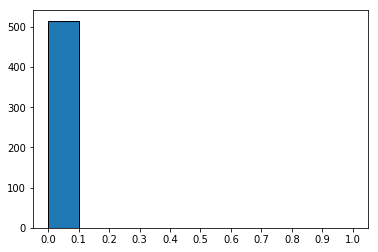

In [33]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [34]:
def intercluster_dist():
    indices = range(num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(wv_matrix[[x[1] for x in cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(wv_matrix[[x[1] for x in cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [35]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 0.5970369553093832
